In [2]:
import sqlite3
import random
from datetime import datetime, timedelta

##################################
### !!! CHAT GPT GENERATED !!! ###
##################################

# Create Via random a fictional banking database containing the following tables:
# 1) customers
# 2) products
# 3) transactions
# 4) marketing_campaigns

# Verbinde zur SQLite-Datenbank
conn = sqlite3.connect('bank_data_2023.db')
cursor = conn.cursor()

# Erstelle Tabellen
cursor.execute('''
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER,
    gender TEXT,
    income INTEGER,
    city TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS products (
    product_id INTEGER PRIMARY KEY,
    product_name TEXT,
    product_type TEXT,
    interest_rate REAL,
    start_date TEXT,
    end_date TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS transactions (
    transaction_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    product_id INTEGER,
    amount REAL,
    transaction_date TEXT,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id),
    FOREIGN KEY (product_id) REFERENCES products (product_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS marketing_campaigns (
    campaign_id INTEGER PRIMARY KEY,
    campaign_name TEXT,
    start_date TEXT,
    end_date TEXT,
    success_rate REAL
)
''')

# Funktion zur Generierung eines zufälligen Datums in 2023
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())),
    )

# Generiere zufällige deutsche Namen
first_names = ["Hans", "Julia", "Michael", "Laura", "Peter", "Anna", "Thomas", "Marie", "Stefan", "Sophie"]
last_names = ["Müller", "Schmidt", "Schneider", "Fischer", "Weber", "Meyer", "Wagner", "Becker", "Schulz", "Hoffmann"]

def random_name():
    return f"{random.choice(first_names)} {random.choice(last_names)}"

# Generiere zufällige deutsche Städte
cities = ["Berlin", "Hamburg", "München", "Köln", "Frankfurt", "Stuttgart", "Düsseldorf", "Dortmund", "Essen", "Leipzig"]

# Insert zufällige Daten in die Tabelle customers
for _ in range(1000):
    name = random_name()
    age = random.randint(18, 70)
    gender = random.choice(['Male', 'Female'])
    income = random.randint(20000, 150000)
    city = random.choice(cities)
    cursor.execute('''
        INSERT INTO customers (name, age, gender, income, city) VALUES (?, ?, ?, ?, ?)
    ''', (name, age, gender, income, city))

# Generiere zufällige Produktnamen und -typen
product_names = ["Basissparkonto", "Premiumsparkonto", "Studentenkredit", "Hypothek", "Autokredit", "Kreditkarte", "Geschäftskredit", "Rentenversicherung"]
product_types = ["Sparbuch", "Kredit", "Kreditkarte", "Hypothek"]

# Insert zufällige Daten in die Tabelle products
for _ in range(100):
    product_name = random.choice(product_names)
    product_type = random.choice(product_types)
    interest_rate = round(random.uniform(1.0, 10.0), 2)
    start_date = random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')
    end_date = random_date(datetime(2024, 1, 1), datetime(2026, 12, 31)).strftime('%Y-%m-%d')
    cursor.execute('''
        INSERT INTO products (product_name, product_type, interest_rate, start_date, end_date) VALUES (?, ?, ?, ?, ?)
    ''', (product_name, product_type, interest_rate, start_date, end_date))

# Insert zufällige Daten in die Tabelle transactions
for _ in range(10000):
    customer_id = random.randint(1, 1000)
    product_id = random.randint(1, 100)
    amount = round(random.uniform(100.0, 10000.0), 2)
    transaction_date = random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')
    cursor.execute('''
        INSERT INTO transactions (customer_id, product_id, amount, transaction_date) VALUES (?, ?, ?, ?)
    ''', (customer_id, product_id, amount, transaction_date))

# Generiere zufällige Marketing-Kampagnen
campaign_names = ["Winterschlussverkauf", "Sommerangebote", "Zurück zur Schule", "Weihnachtsaktionen", "Neujahrsangebot"]

# Insert zufällige Daten in die Tabelle marketing_campaigns
for _ in range(50):
    campaign_name = random.choice(campaign_names)
    start_date = random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')
    end_date = random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')
    success_rate = round(random.uniform(0.0, 1.0), 2)
    cursor.execute('''
        INSERT INTO marketing_campaigns (campaign_name, start_date, end_date, success_rate) VALUES (?, ?, ?, ?)
    ''', (campaign_name, start_date, end_date, success_rate))

# Commit die Transaktionen und schließe die Verbindung
conn.commit()
conn.close()

In [3]:
################
# Explore Data #
################

In [4]:
conn = sqlite3.connect("bank_data_2023.db")
cursor = conn.cursor()

In [5]:
### help functions
def printCommand(command):
    cursor.execute(command)

    rows = cursor.fetchall()
    for r in rows:
        print(r)
        
def returnCommand(command):
    cursor.execute(command)

    return cursor.fetchall()
            

In [6]:
printCommand("SELECT name FROM sqlite_master WHERE type='table';")

('customers',)
('products',)
('transactions',)
('marketing_campaigns',)


In [7]:
printCommand("PRAGMA table_info(customers);")

(0, 'customer_id', 'INTEGER', 0, None, 1)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'age', 'INTEGER', 0, None, 0)
(3, 'gender', 'TEXT', 0, None, 0)
(4, 'income', 'INTEGER', 0, None, 0)
(5, 'city', 'TEXT', 0, None, 0)


In [8]:
printCommand("PRAGMA table_info(products);")

(0, 'product_id', 'INTEGER', 0, None, 1)
(1, 'product_name', 'TEXT', 0, None, 0)
(2, 'product_type', 'TEXT', 0, None, 0)
(3, 'interest_rate', 'REAL', 0, None, 0)
(4, 'start_date', 'TEXT', 0, None, 0)
(5, 'end_date', 'TEXT', 0, None, 0)


In [9]:
printCommand("PRAGMA table_info(transactions);")

(0, 'transaction_id', 'INTEGER', 0, None, 1)
(1, 'customer_id', 'INTEGER', 0, None, 0)
(2, 'product_id', 'INTEGER', 0, None, 0)
(3, 'amount', 'REAL', 0, None, 0)
(4, 'transaction_date', 'TEXT', 0, None, 0)


In [10]:
printCommand("PRAGMA table_info(marketing_campaigns);")

(0, 'campaign_id', 'INTEGER', 0, None, 1)
(1, 'campaign_name', 'TEXT', 0, None, 0)
(2, 'start_date', 'TEXT', 0, None, 0)
(3, 'end_date', 'TEXT', 0, None, 0)
(4, 'success_rate', 'REAL', 0, None, 0)


In [11]:
printCommand("SELECT * FROM customers LIMIT 10;")

(1, 'Julia Wagner', 66, 'Female', 95311, 'Köln')
(2, 'Marie Weber', 56, 'Female', 27747, 'Essen')
(3, 'Sophie Schneider', 39, 'Female', 146560, 'Düsseldorf')
(4, 'Thomas Meyer', 40, 'Female', 43975, 'Leipzig')
(5, 'Stefan Schulz', 28, 'Female', 36934, 'Köln')
(6, 'Hans Fischer', 57, 'Male', 48163, 'Köln')
(7, 'Hans Wagner', 44, 'Female', 45646, 'Essen')
(8, 'Peter Becker', 18, 'Male', 64003, 'Frankfurt')
(9, 'Peter Schmidt', 19, 'Male', 111942, 'Essen')
(10, 'Peter Schulz', 70, 'Female', 147348, 'Frankfurt')


In [12]:
print(len(returnCommand("SELECT city FROM customers WHERE city == 'Köln'")))

670


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_4054/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
df_customers = pd.read_sql_query("SELECT * FROM customers", conn)

In [15]:
df_customers.head()

,customer_id,name,age,gender,income,city
0,1,Julia Wagner,66,Female,95311,Köln
1,2,Marie Weber,56,Female,27747,Essen
2,3,Sophie Schneider,39,Female,146560,Düsseldorf
3,4,Thomas Meyer,40,Female,43975,Leipzig
4,5,Stefan Schulz,28,Female,36934,Köln


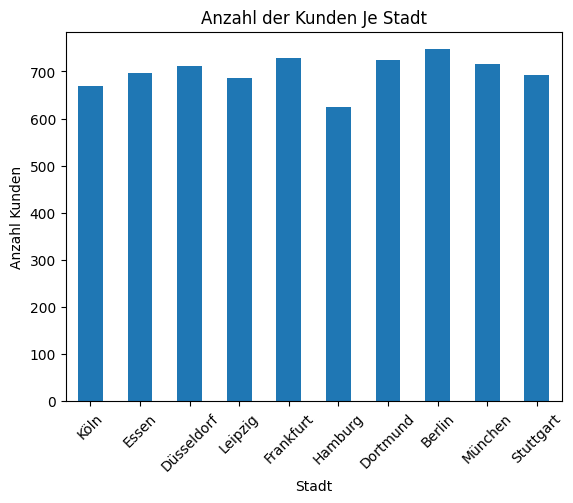

In [16]:
data = {"city":[],
       "customer_count":[]}

for city in df_customers['city'].unique():
    amount = len(df_customers[df_customers['city'] == city])
    data["city"].append(city)
    data["customer_count"].append(amount)

df_cities = pd.DataFrame(data)
df_cities.plot(kind="bar", x="city", y="customer_count", legend=False)

plt.title("Anzahl der Kunden Je Stadt")
plt.xlabel("Stadt")
plt.ylabel("Anzahl Kunden")
plt.xticks(rotation=45)
plt.show()

In [17]:
female_amount = returnCommand("SELECT COUNT(gender) FROM customers WHERE gender == 'Female';")[0]

In [18]:
male_amount = returnCommand("SELECT COUNT(gender) FROM customers WHERE gender == 'Male';")[0]

In [19]:
data = {"gender":["Male", "Female"],
       "amount":[int(male_amount[0]), int(female_amount[0])]
                 }

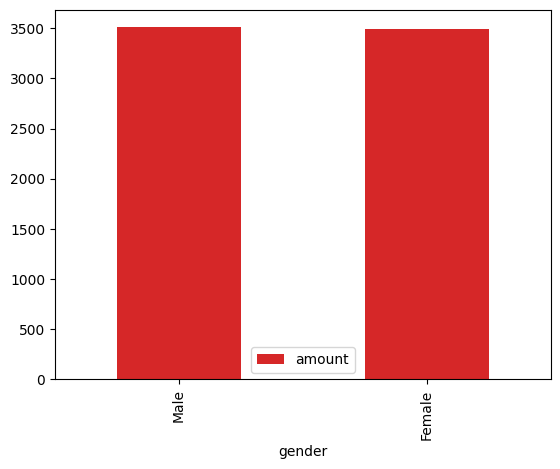

In [20]:
df_m_f_amount = pd.DataFrame(data)
df_m_f_amount.plot(kind="bar", x="gender", y="amount", color="tab:red")
plt.show()

In [21]:
printCommand("PRAGMA table_info(products);")

(0, 'product_id', 'INTEGER', 0, None, 1)
(1, 'product_name', 'TEXT', 0, None, 0)
(2, 'product_type', 'TEXT', 0, None, 0)
(3, 'interest_rate', 'REAL', 0, None, 0)
(4, 'start_date', 'TEXT', 0, None, 0)
(5, 'end_date', 'TEXT', 0, None, 0)


In [22]:
printCommand("SELECT * FROM transactions LIMIT  10;")

(1, 572, 31, 8711.11, '2023-08-31')
(2, 913, 41, 2763.64, '2023-05-01')
(3, 209, 84, 2530.07, '2023-05-18')
(4, 23, 84, 3177.38, '2023-04-07')
(5, 201, 45, 5709.38, '2023-01-30')
(6, 858, 63, 7499.65, '2023-01-15')
(7, 504, 57, 7111.72, '2023-08-17')
(8, 896, 63, 9444.19, '2023-04-12')
(9, 458, 51, 6397.65, '2023-07-25')
(10, 730, 70, 7545.7, '2023-07-13')


In [23]:
df_product_used = pd.read_sql_query("""SELECT products.product_name, SUM(transactions.transaction_id) as transaction_count
FROM transactions
JOIN products ON transactions.product_id = products.product_id
GROUP BY products.product_name;
""", conn)



In [24]:
printCommand("""SELECT products.product_name, SUM(transactions.transaction_id) as transaction_count
FROM transactions
JOIN products ON transactions.product_id = products.product_id
GROUP BY products.product_name;
""")

('Autokredit', 367429945)
('Basissparkonto', 268217945)
('Geschäftskredit', 296505207)
('Hypothek', 340800185)
('Kreditkarte', 492183738)
('Premiumsparkonto', 144877709)
('Rentenversicherung', 242601505)
('Studentenkredit', 297418766)


In [25]:
df_product_used.columns

Index(['product_name', 'transaction_count'], dtype='object')

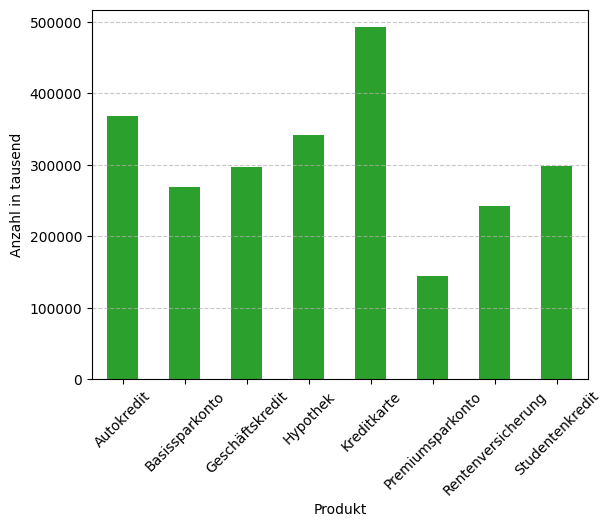

In [26]:
df_product_used["transaction_count_scaled"] = df_product_used["transaction_count"] / 1000

df_product_used.plot(kind="bar", x="product_name", y="transaction_count_scaled", legend=False, color="tab:green")
plt.xticks(rotation=45)
plt.xlabel("Produkt")
plt.ylabel("Anzahl in tausend")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

In [27]:
df_prod_city_amount = pd.read_sql_query("""
SELECT
    customers.city AS city,
    products.product_name AS product_name,
    COUNT(transactions.transaction_id) AS usage_count
FROM transactions
JOIN products ON transactions.product_id = products.product_id
JOIN customers ON transactions.customer_id = customers.customer_id
GROUP BY customers.city, products.product_name
ORDER BY customers.city, usage_count DESC;
""", conn)

In [28]:
df_prod_city_amount.head()

,city,product_name,usage_count
0,Berlin,Kreditkarte,1409
1,Berlin,Autokredit,1085
2,Berlin,Hypothek,1011
3,Berlin,Studentenkredit,942
4,Berlin,Geschäftskredit,882


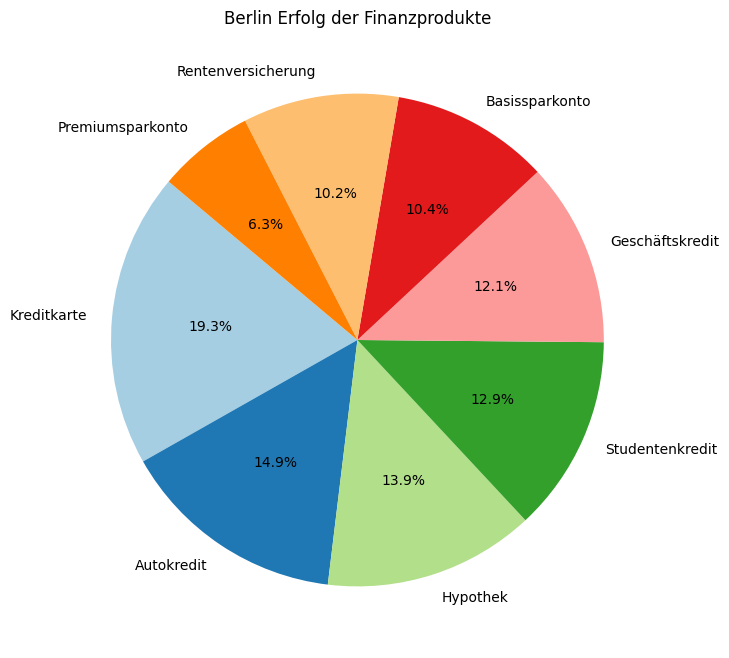

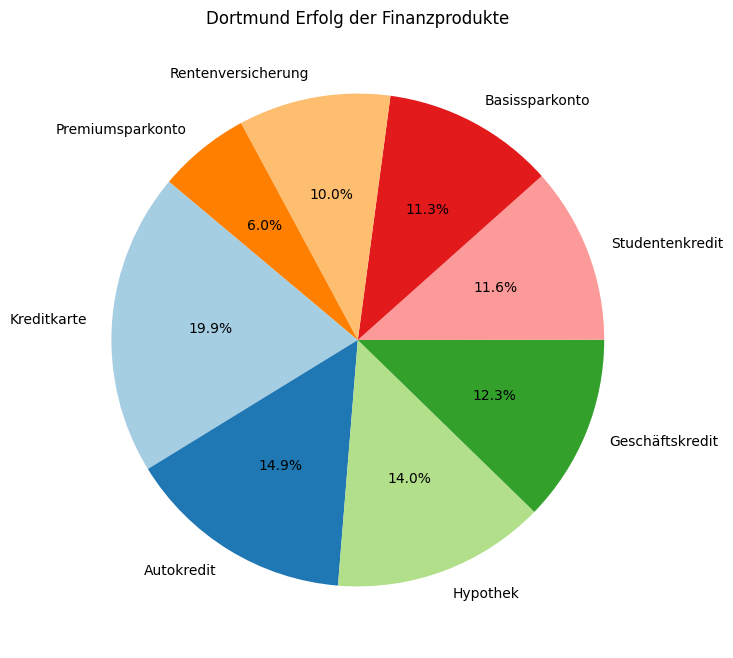

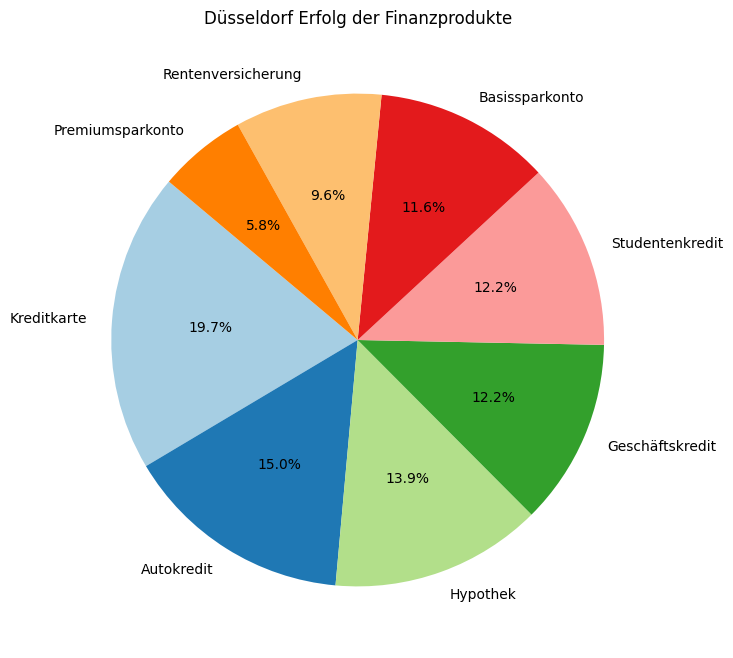

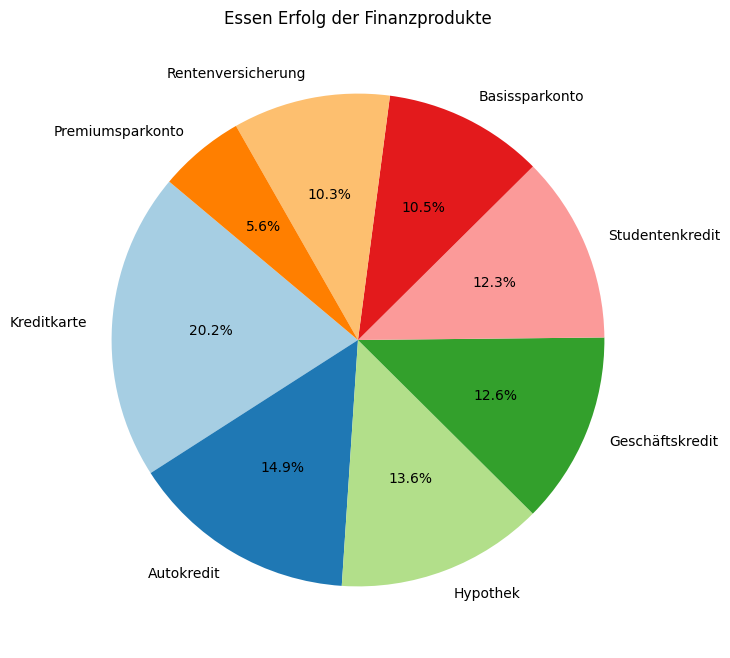

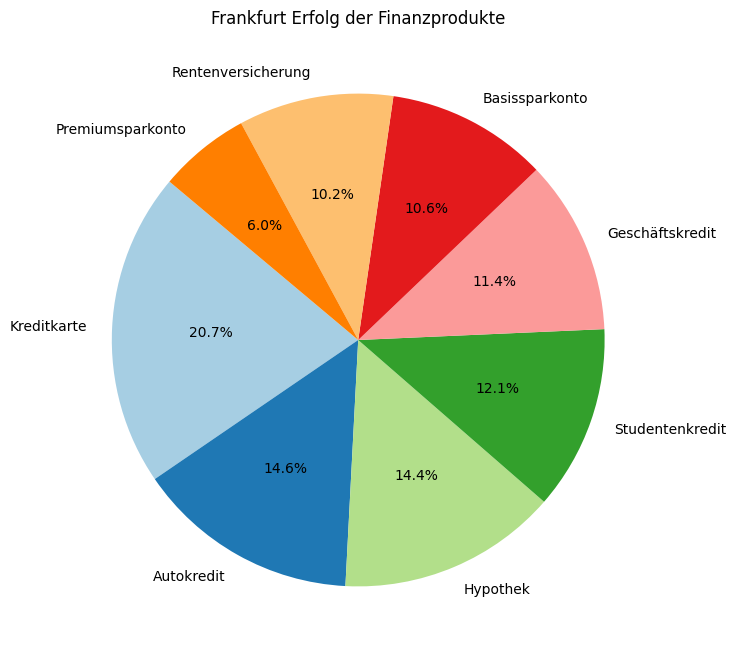

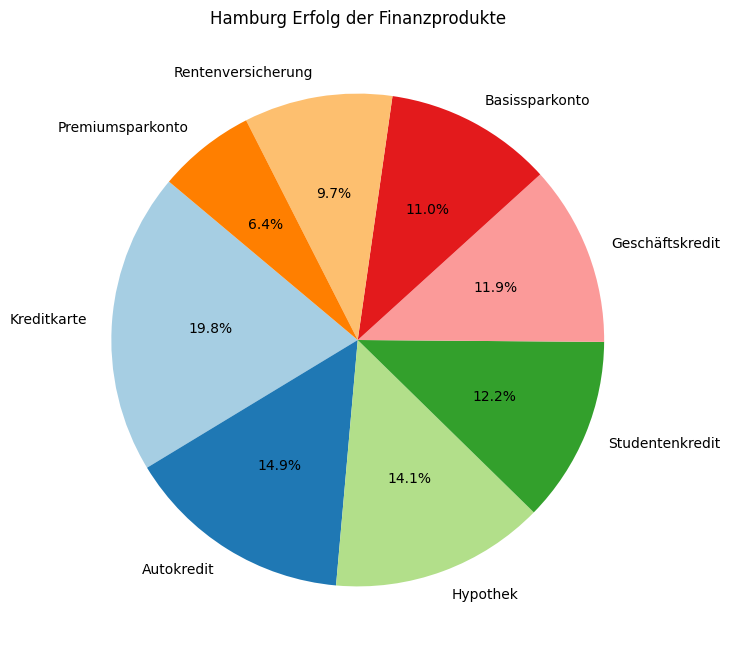

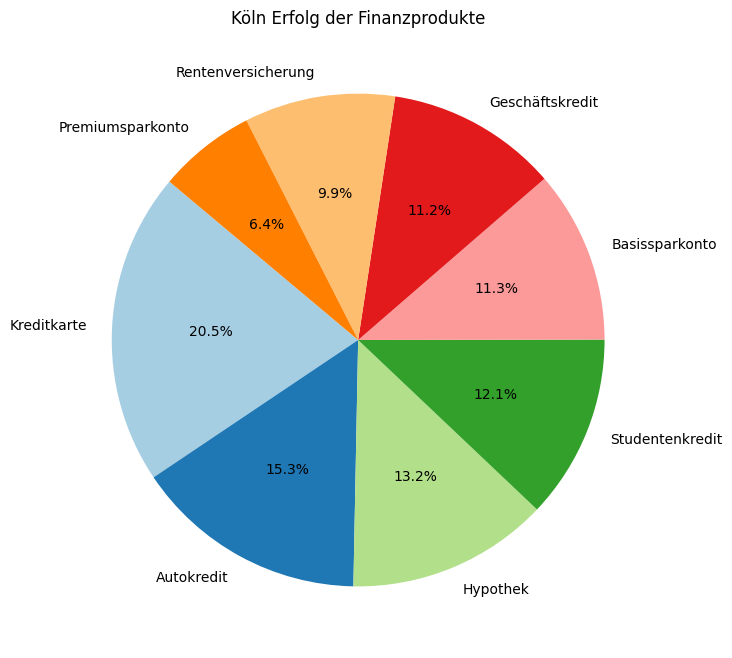

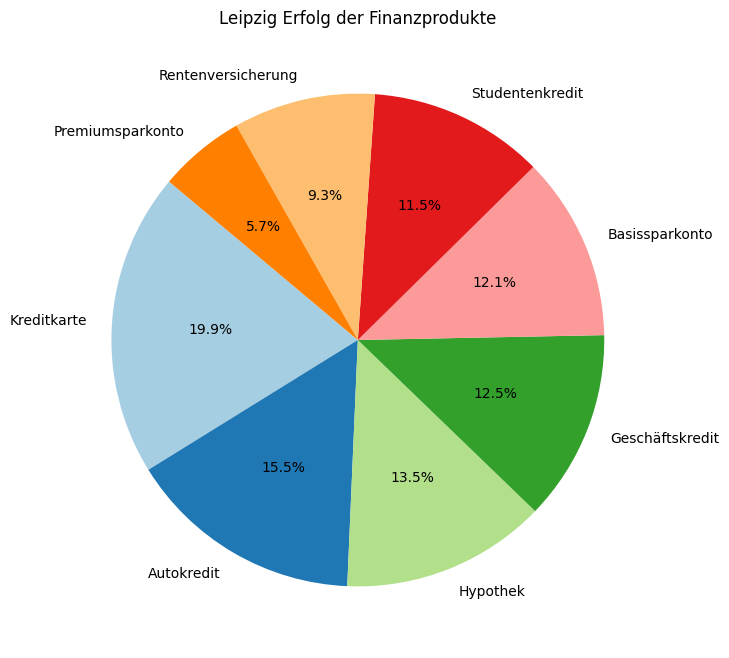

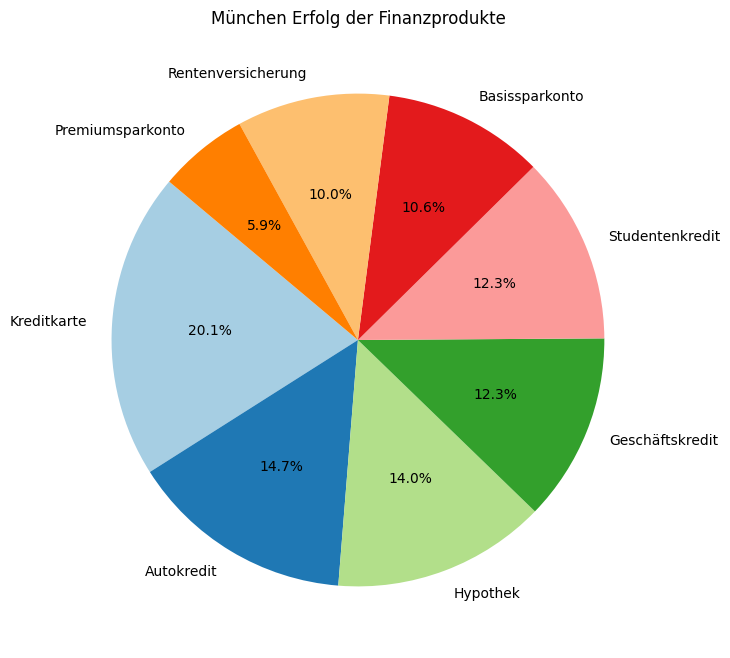

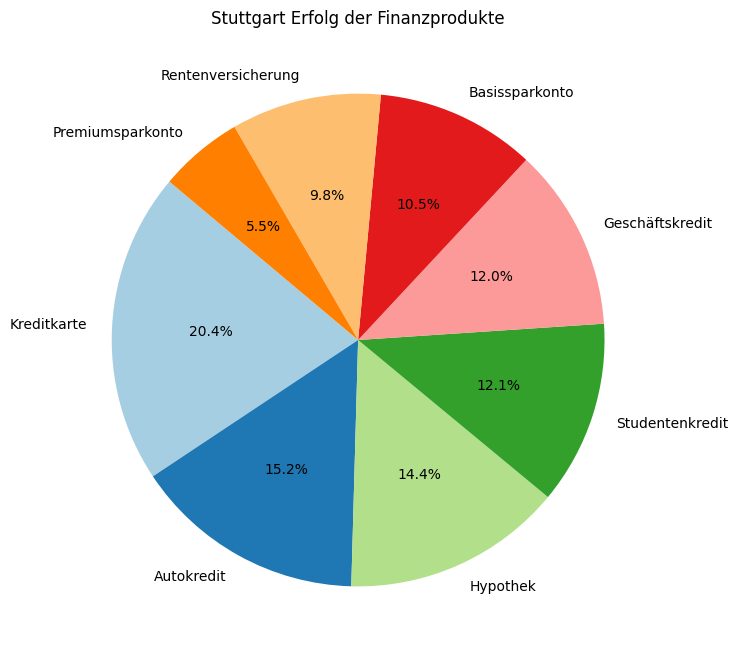

In [29]:
for c in df_prod_city_amount['city'].unique():

    elem = df_prod_city_amount[df_prod_city_amount["city"] == c]
    
    plt.figure(figsize=(10,8))
    plt.pie(elem['usage_count'], labels=elem['product_name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(elem))))

    plt.title(f"{c}: Erfolg der Finanzprodukte")
    plt.show()

### 

In [30]:
df_prod_city_amount[df_prod_city_amount["city"] == "Berlin"]["product_name"]

0           Kreditkarte
1            Autokredit
2              Hypothek
3       Studentenkredit
4       Geschäftskredit
5        Basissparkonto
6    Rentenversicherung
7      Premiumsparkonto
Name: product_name, dtype: object

In [48]:
printCommand("""
SELECT name FROM sqlite_master WHERE type='table';
""")

('customers',)
('products',)
('transactions',)
('marketing_campaigns',)


In [40]:
printCommand("""
PRAGMA table_info(products)
""")

(0, 'product_id', 'INTEGER', 0, None, 1)
(1, 'product_name', 'TEXT', 0, None, 0)
(2, 'product_type', 'TEXT', 0, None, 0)
(3, 'interest_rate', 'REAL', 0, None, 0)
(4, 'start_date', 'TEXT', 0, None, 0)
(5, 'end_date', 'TEXT', 0, None, 0)


In [41]:
printCommand("""
PRAGMA table_info(transactions)
""")

(0, 'transaction_id', 'INTEGER', 0, None, 1)
(1, 'customer_id', 'INTEGER', 0, None, 0)
(2, 'product_id', 'INTEGER', 0, None, 0)
(3, 'amount', 'REAL', 0, None, 0)
(4, 'transaction_date', 'TEXT', 0, None, 0)


In [72]:
printCommand("""
SELECT products.product_name, COUNT(transactions.transaction_id) as count
FROM transactions
JOIN products ON transactions.transaction_id = products.product_id
GROUP BY products.product_name
""")

('Autokredit', 83)
('Basissparkonto', 93)
('Geschäftskredit', 102)
('Hypothek', 84)
('Kreditkarte', 96)
('Premiumsparkonto', 72)
('Rentenversicherung', 84)
('Studentenkredit', 86)


In [73]:
printCommand("""
SELECT products.product_name, products.product_type, COUNT(transactions.transaction_id)
FROM transactions
JOIN products ON products.product_id = transactions.transaction_id
GROUP BY products.product_name
""")

('Autokredit', 'Kredit', 83)
('Basissparkonto', 'Kreditkarte', 93)
('Geschäftskredit', 'Kreditkarte', 102)
('Hypothek', 'Kredit', 84)
('Kreditkarte', 'Sparbuch', 96)
('Premiumsparkonto', 'Kreditkarte', 72)
('Rentenversicherung', 'Kredit', 84)
('Studentenkredit', 'Sparbuch', 86)


In [80]:
printCommand("""
SELECT products.product_name, products.product_type, COUNT(transactions.transaction_id), ROUND(SUM(transactions.amount), 2)
FROM transactions
JOIN products ON products.product_id=transactions.transaction_id
GROUP BY products.product_name
""")

('Autokredit', 'Kredit', 83, 436731.59)
('Basissparkonto', 'Kreditkarte', 93, 480943.94)
('Geschäftskredit', 'Kreditkarte', 102, 455940.21)
('Hypothek', 'Kredit', 84, 457260.99)
('Kreditkarte', 'Sparbuch', 96, 511691.57)
('Premiumsparkonto', 'Kreditkarte', 72, 359229.53)
('Rentenversicherung', 'Kredit', 84, 438551.57)
('Studentenkredit', 'Sparbuch', 86, 456846.61)


In [81]:
printCommand("""
SELECT products.product_type, COUNT(transactions.transaction_id)
FROM transactions
JOIN products ON products.product_id=transactions.transaction_id
GROUP BY products.product_type
""")

('Hypothek', 197)
('Kredit', 168)
('Kreditkarte', 169)
('Sparbuch', 166)
